<a href="https://colab.research.google.com/github/mgovindasamy/Machine-Learning-Examples/blob/master/HyperParameterTuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Colab heading

In [2]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_digits

In [3]:
digits = load_digits()

In [4]:
print(digits.data.shape)

(1797, 64)


In [5]:
 import matplotlib.pyplot as plt

<Figure size 432x288 with 0 Axes>

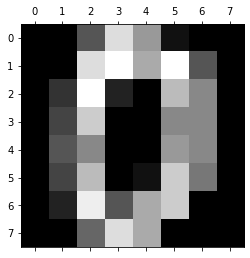

In [6]:
plt.gray()
plt.matshow(digits.images[0])
plt.show()

#Dataset split and test with RandomForestClassifier alone

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.3)


In [8]:
clf = RandomForestClassifier(max_depth=2, random_state=0)

In [9]:
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [10]:
clf.score(X_test,y_test)

0.8425925925925926

In [11]:
clf.base_estimator

DecisionTreeClassifier()

In [12]:
from sklearn.model_selection import cross_val_score
cross_val_score(RandomForestClassifier(max_depth=2, random_state=0),digits.data, digits.target, cv=5)

array([0.79444444, 0.78333333, 0.79108635, 0.81337047, 0.77994429])

In [13]:
import numpy as np
max_depth = [2,3,4,5,6,7]
random_state=[0,1,2,3,4,5]
avg_scores = {}
for md in max_depth:
    for rs in random_state:
        cv_scores = cross_val_score(RandomForestClassifier(max_depth=md, random_state=rs),digits.data, digits.target, cv=5)
        avg_scores[str(max_depth) + '_' + str(random_state)] = np.average(cv_scores)

avg_scores

{'[2, 3, 4, 5, 6, 7]_[0, 1, 2, 3, 4, 5]': 0.9276818322500773}

GridSearchCV

In [14]:
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(RandomForestClassifier(),{
    'max_depth': [2,3,4,5,6,7],
    'random_state': [0,1,2,3,4,5]
}, cv=5, return_train_score=False)
clf.fit(digits.data, digits.target)
clf.cv_results_

{'mean_fit_time': array([0.19990907, 0.196349  , 0.19943171, 0.19681792, 0.19470878,
        0.20333858, 0.21481285, 0.22028255, 0.21359344, 0.21736965,
        0.21907663, 0.21725059, 0.23912654, 0.24365535, 0.23823991,
        0.24139166, 0.24136233, 0.23744626, 0.26472487, 0.26630244,
        0.26348515, 0.26906505, 0.26148047, 0.2640254 , 0.28712478,
        0.28794136, 0.29336691, 0.28294034, 0.28342886, 0.28189464,
        0.31013222, 0.31764631, 0.31851773, 0.30995355, 0.30424066,
        0.31061506]),
 'mean_score_time': array([0.01651993, 0.0147841 , 0.01490393, 0.01467509, 0.01434684,
        0.01504874, 0.01517148, 0.01593018, 0.01532044, 0.01669922,
        0.01561723, 0.01516309, 0.01604118, 0.01607146, 0.01597772,
        0.01623354, 0.01612644, 0.01616921, 0.01639004, 0.01623154,
        0.01751866, 0.01958928, 0.01640019, 0.01636524, 0.01683006,
        0.01713953, 0.01761713, 0.01721435, 0.01710429, 0.01742802,
        0.01771693, 0.01862545, 0.01880722, 0.01907153, 0.

In [15]:
import pandas as pd
df = pd.DataFrame(clf.cv_results_)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_random_state,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.199909,0.006435,0.016520,0.002427,2,0,"{'max_depth': 2, 'random_state': 0}",0.794444,0.783333,0.791086,0.813370,0.779944,0.792436,0.011688,31
1,0.196349,0.005357,0.014784,0.000496,2,1,"{'max_depth': 2, 'random_state': 1}",0.802778,0.783333,0.782730,0.782730,0.796657,0.789646,0.008451,33
2,0.199432,0.003776,0.014904,0.000542,2,2,"{'max_depth': 2, 'random_state': 2}",0.802778,0.775000,0.768802,0.757660,0.774373,0.775723,0.014889,35
3,0.196818,0.006176,0.014675,0.000533,2,3,"{'max_depth': 2, 'random_state': 3}",0.802778,0.736111,0.782730,0.788301,0.757660,0.773516,0.023708,36
4,0.194709,0.004247,0.014347,0.000076,2,4,"{'max_depth': 2, 'random_state': 4}",0.786111,0.775000,0.782730,0.777159,0.779944,0.780189,0.003942,34
5,0.203339,0.021752,0.015049,0.000884,2,5,"{'max_depth': 2, 'random_state': 5}",0.811111,0.769444,0.777159,0.821727,0.774373,0.790763,0.021359,32
6,0.214813,0.005931,0.015171,0.000247,3,0,"{'max_depth': 3, 'random_state': 0}",0.869444,0.797222,0.841226,0.857939,0.827298,0.838626,0.025188,28
7,0.220283,0.009096,0.015930,0.001374,3,1,"{'max_depth': 3, 'random_state': 1}",0.863889,0.794444,0.832869,0.841226,0.838440,0.834174,0.022499,30
8,0.213593,0.003422,0.015320,0.000623,3,2,"{'max_depth': 3, 'random_state': 2}",0.852778,0.805556,0.830084,0.869081,0.824513,0.836402,0.022221,29
9,0.217370,0.004679,0.016699,0.002130,3,3,"{'max_depth': 3, 'random_state': 3}",0.888889,0.816667,0.844011,0.852368,0.832869,0.846961,0.024134,25


In [16]:
df[['params','param_max_depth','mean_test_score']]  

,params,param_max_depth,mean_test_score
0,"{'max_depth': 2, 'random_state': 0}",2,0.792436
1,"{'max_depth': 2, 'random_state': 1}",2,0.789646
2,"{'max_depth': 2, 'random_state': 2}",2,0.775723
3,"{'max_depth': 2, 'random_state': 3}",2,0.773516
4,"{'max_depth': 2, 'random_state': 4}",2,0.780189
5,"{'max_depth': 2, 'random_state': 5}",2,0.790763
6,"{'max_depth': 3, 'random_state': 0}",3,0.838626
7,"{'max_depth': 3, 'random_state': 1}",3,0.834174
8,"{'max_depth': 3, 'random_state': 2}",3,0.836402
9,"{'max_depth': 3, 'random_state': 3}",3,0.846961


In [17]:
clf.best_params_

{'max_depth': 7, 'random_state': 5}

In [18]:
clf.best_score_

0.9276818322500773

In [19]:
clf.best_estimator_

RandomForestClassifier(max_depth=7, random_state=5)

In [32]:
model_params = {
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'max_depth': [2,3,4,5,6,7],
            'random_state': [0,1,2,3,4,5],
            'n_estimators': [1,5,10]
        }  
    },
    'logistic_regression': {
        'model': LogisticRegression(),
        'params' : {
            'penalty': ['l1', 'l2', 'elasticnet', 'none'],
            'random_state': [0,1,2,3,4,5],
            'solver': ['newton-cg', 'lbfgs']
        }
    },
    'GaussianNB' : {
        'model': GaussianNB(),
        'params' : {
            'var_smoothing': [1e-09]
        }
    },
    'MultinomialNB': {
        'model': MultinomialNB(),
        'params' : {
            'fit_prior': ['True','False']
        }
    },
    'DecisionTreeClassifier': {
        'model': DecisionTreeClassifier(),
        'params' : {
            'criterion': ['gini','entropy'],
            'splitter': ['best','random'],
            'max_depth': [2,3,4,5,6,7],
            'max_features': ['auto','sqrt','log2']
        }
    }
}

In [33]:
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(digits.data, digits.target)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


,model,best_score,best_params
0,random_forest,0.895410,"{'max_depth': 7, 'n_estimators': 10, 'random_s..."
1,logistic_regression,0.914316,"{'penalty': 'l2', 'random_state': 0, 'solver':..."
2,GaussianNB,0.806928,{'var_smoothing': 1e-09}
3,MultinomialNB,0.870350,{'fit_prior': 'True'}
4,DecisionTreeClassifier,0.727878,"{'criterion': 'entropy', 'max_depth': 7, 'max_..."
